In [2]:
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')

import utility

from math import ceil

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

figure_path = module_path + '/figures/'

sys.path.insert(1, module_path + '/src/')

from matplotlib.font_manager import FontProperties
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)
colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
colors_opa = ['#F9414466', '#90BE6D66', '#57759066','#F3722C66', '#F8961E66',
              '#F9844A66', '#F9C74F66', '#43AA8B66', '#4D908E66', '#277DA166']

sns.set_palette(sns.color_palette(colors))

def znorm(timeseries):
    mean = np.mean(timeseries)
    sd = np.std(timeseries)
    return (timeseries - mean)/sd

target_rate = 44100
ds_target_rate = 8000

import os
names = []
files_path = module_path + '/data/minimal_dataset/data/'
names_full = os.listdir(files_path)
for n in names_full:
    if '_lungelyd_' in n:
        names.append(n)
        
X = pd.read_csv(module_path + '/data/minimal_dataset/info.csv')
del names_full

In [6]:
len(X['patient_id'].unique())

632

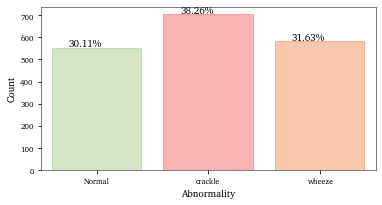

In [9]:
def without_hue(plot, feature, filename):
    total = len(feature)
    
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.25
        y = p.get_y() + p.get_height() + 5
        ax.annotate(percentage, (x, y), fontproperties = font)
    
    plt.savefig(filename, bbox_inches='tight')
    
    
f, ax = plt.subplots(1,1)
f.set_size_inches(6, 3)
ax = sns.countplot(x = 'label', data = X)
ax.set_ylabel('Count', fontproperties = font)
ax.set_xlabel('Abnormality', fontproperties = font)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    #name = label.get_text()
    #new_label = str(new_names[name])
    #new_labels.append(new_label)

ax.set_xticklabels(['Normal', 'crackle', 'wheeze'])
#ax.grid(linewidth = 0.3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
count = 0
for child in ax.get_children():
    if type(child) == matplotlib.patches.Rectangle:
        count = count + 1
        
        if (count == 1):
            child.set_color(colors_opa[1])
        elif (count == 2):
            child.set_color(colors_opa[0])
        elif (count == 3):
            child.set_color(colors_opa[3])


without_hue(ax,X.label , figure_path + "histoLabels_compressed_dataset.pdf" )  